In [130]:
# Gerekli kütüphanelerin import edilmesi
import pandas as pd  # Veri işleme için
import matplotlib.pyplot as plt  # Görselleştirme için
import seaborn as sns  # Görselleştirme için
import numpy as np  # Matematiksel işlemler için
from sklearn.ensemble import RandomForestRegressor  # Makine öğrenimi modeli için

In [131]:
# Veri setinin yüklenmesi
df = pd.read_csv("disney_plus.csv")


In [132]:
# Eksik değerlerin incelenmesi
missing_values = df.isnull().sum()
print("Boş değerler:")
print(missing_values)


Boş değerler:
show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64


In [133]:
# Eksik ülke ve tarih eklemelerinin doldurulması
df['country'].fillna("United States", inplace=True)
df['date_added'].fillna("Unknown", inplace=True)
df['rating'].fillna("TV-MA", inplace=True)

In [134]:
# Tarih sütununun temizlenmesi ve yıl bilgisinin çıkartılması
df['year'] = df['date_added'].apply(lambda x: str(x).split(",")[-1].strip())


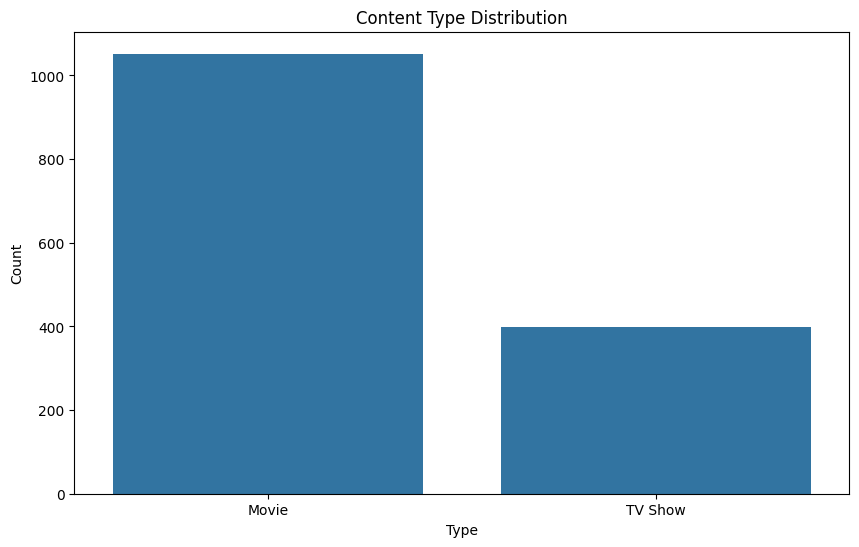

In [135]:
# Görselleştirme için veri temizleme ve ön işleme sonrası işlemler

# İçerik türünün dağılımının görselleştirilmesi
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

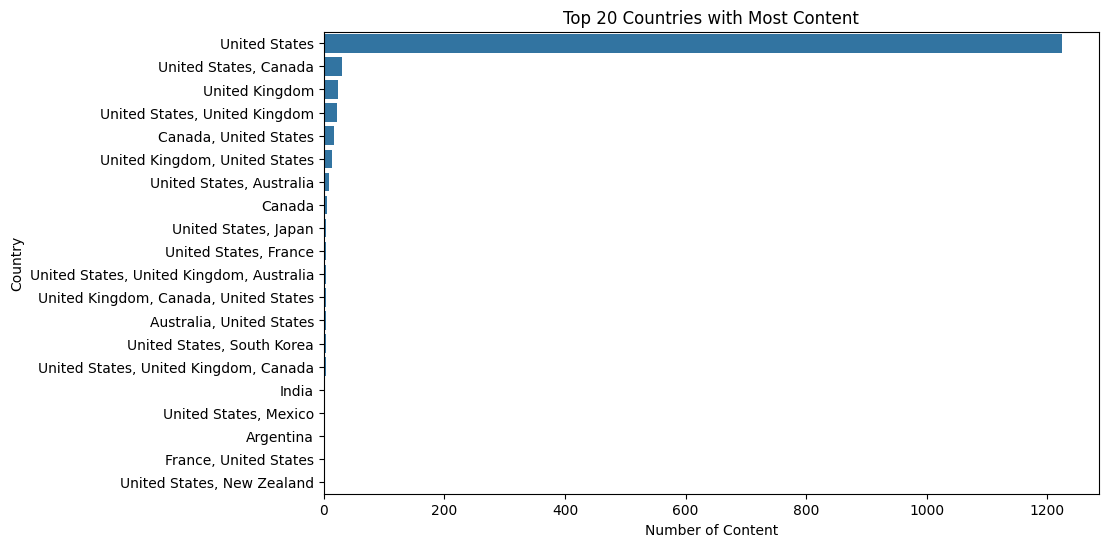

In [136]:
#En çok içerik üretilen ilk 20 ülkenin görselleştirilmesi
plt.figure(figsize=(10, 6))
x = df['country'].value_counts().head(20)
sns.barplot(x=x.values, y=x.index)
plt.title('Top 20 Countries with Most Content')
plt.xlabel('Number of Content')
plt.ylabel('Country')
plt.show()

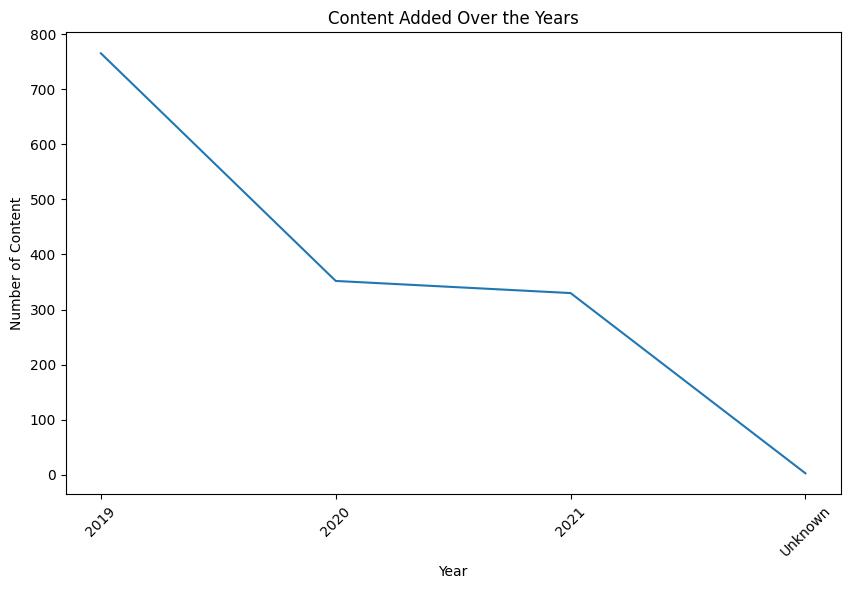

In [137]:
# Yıllara göre eklenen içeriklerin görselleştirilmesi
plt.figure(figsize=(10, 6))
x = df['year'].value_counts().sort_index()
sns.lineplot(x=x.index, y=x.values)
plt.title('Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Content')
plt.xticks(rotation=45)
plt.show()

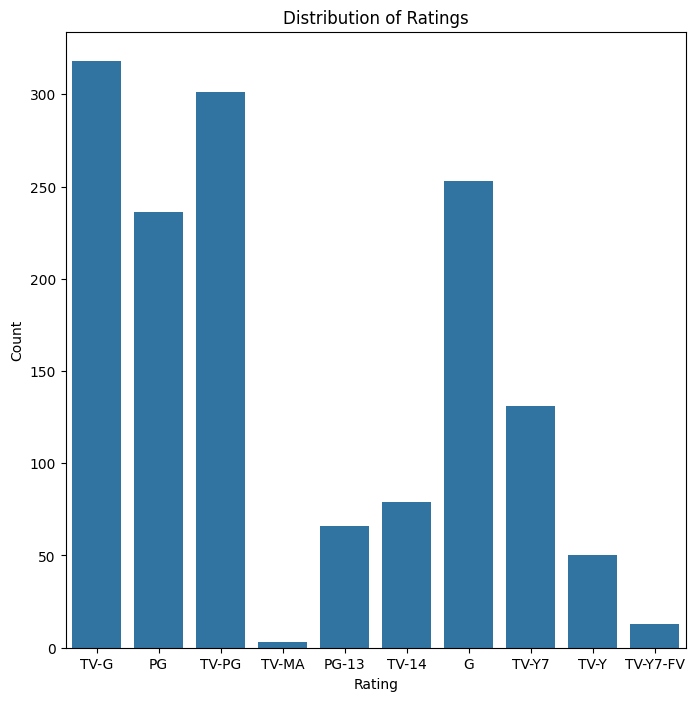

In [138]:
# İçerik ratinglerinin dağılımının görselleştirilmesi
plt.figure(figsize=(8,8))
sns.countplot(x="rating", data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [139]:
# Sayısal verilerin korelasyon matrisinin oluşturulması ve görselleştirilmesi
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()


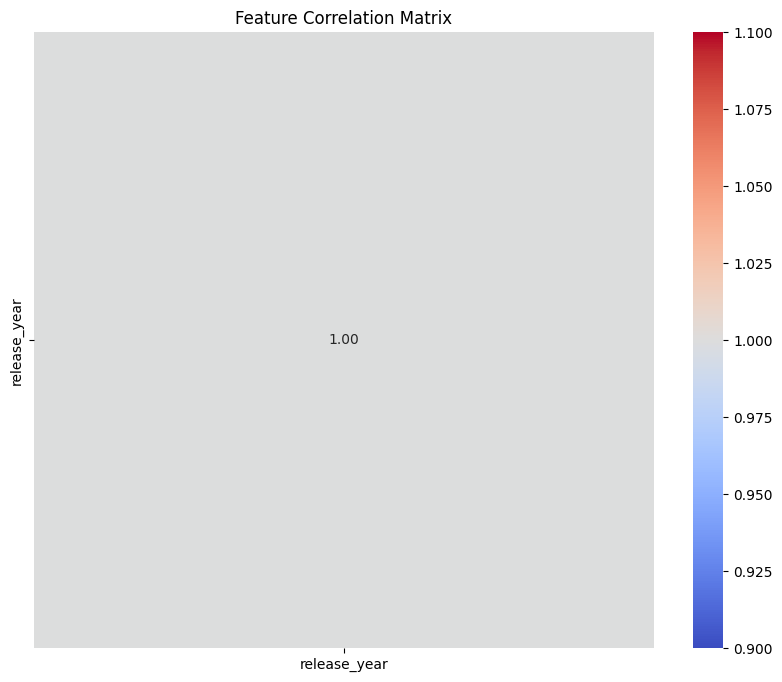

In [140]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

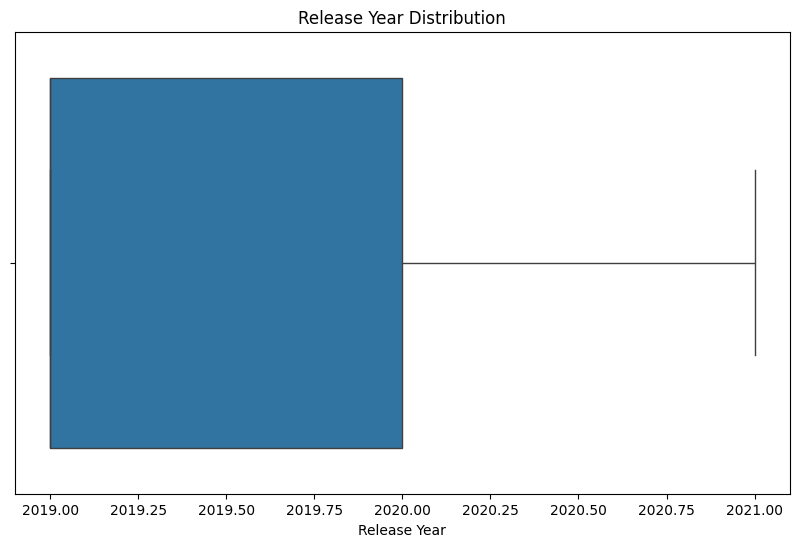

In [142]:
# 'Unknown' değerlerinin NaN olarak işaretlenmesi
df['date_added'] = df['date_added'].replace('Unknown', np.nan)

# Tarih sütununun datetime türüne dönüştürülmesi ve yıl bilgisinin çıkarılması
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_year'] = df['date_added'].dt.year

# Outlier temizliği
plt.figure(figsize=(10, 6))
sns.boxplot(x='release_year', data=df)
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.show()

In [143]:
# 'release_year' sütunundaki aykırı değerlerin temizlenmesi
df = df[(df['release_year'] >= 1900) & (df['release_year'] <= 2023)]


In [144]:
# Özellik Mühendisliği
# 'cast' sütunundaki oyuncu sayısının hesaplanması
df['cast_count'] = df['cast'].apply(lambda x: len(str(x).split(',')))

In [145]:
# 'duration' sütunundaki sürenin dakika cinsine dönüştürülmesi
df['duration_min'] = df['duration'].apply(lambda x: int(x.split(' ')[0]) if 'min' in x else 0)


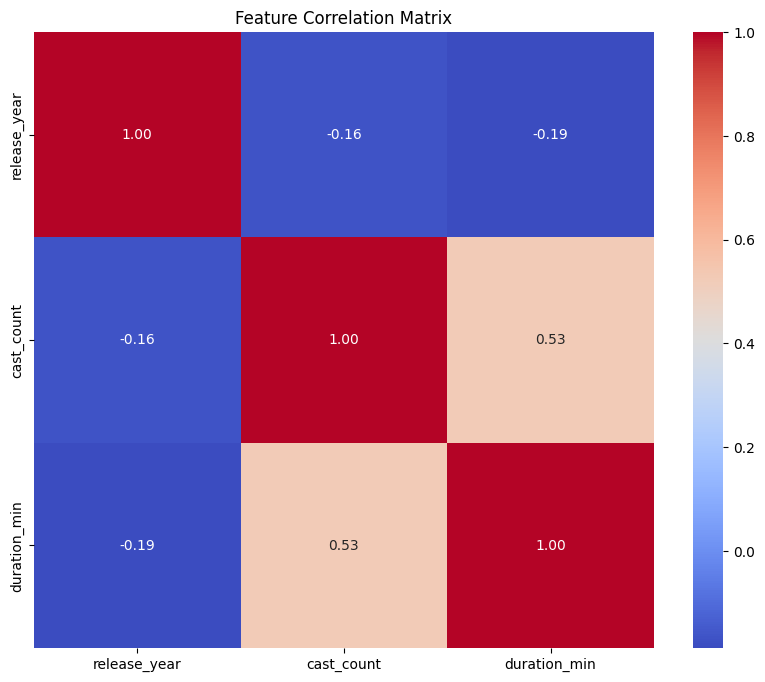

In [146]:
# Sayısal sütunların seçilmesi
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Korelasyon matrisinin oluşturulması ve görselleştirilmesi
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

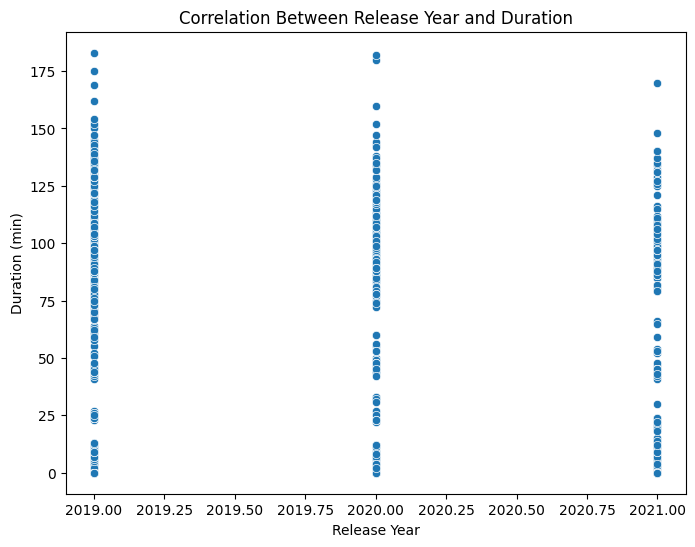

In [147]:
# 'release_year' ve 'duration_min' arasındaki korelasyonu görselleştir
plt.figure(figsize=(8, 6))
sns.scatterplot(x='release_year', y='duration_min', data=df)
plt.title('Correlation Between Release Year and Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (min)')
plt.show()

In [148]:
# Özelliklerin önem sıralamasının belirlenmesi

# Model için kullanılacak özellikler
features = ['release_year', 'duration_min', 'cast_count']

In [149]:
# Bağımlı değişken
target = 'rating'


In [150]:
# NaN değerlerin bulunduğu satırların atılması
df_dropna = df.dropna(subset=features + [target])


In [151]:
# Model için bağımlı ve bağımsız değişkenlerin ayrılması
X = df_dropna[features]
y = df_dropna[target]


In [152]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [153]:
model = RandomForestRegressor(random_state=42)
model.fit(X, y_encoded)


RandomForestRegressor(random_state=42)

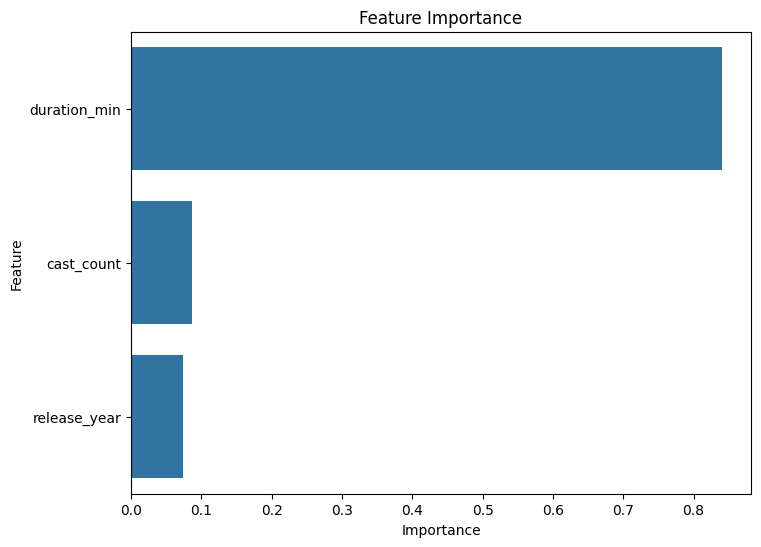

In [154]:
# Özelliklerin önem sırasının görselleştirilmesi
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances[indices], y=np.array(features)[indices])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [155]:
# Veri setinin ilk beş gözleminin gösterilmesi
print(df.head())

  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...  United States   
1           Jim Varney, Noelle Parker, Douglas Seale  United States   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough